In [279]:
import os
import cv2
import matplotlib.pyplot as plt

In [280]:
from keras.preprocessing import image

# Create categories as with_mask and without_mask

In [281]:
categories=['with_mask','without_mask']

In [282]:
data=[]
for category in categories:
    path=os.path.join('Images/train',category)
    label=categories.index(category)
    
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        
        data.append([img,label])

In [283]:
len(data)

1279

## Shuffle data

In [284]:
import random
random.shuffle(data)

# Seperate features and lables

In [285]:
x=[]
y=[]
for features,label in data:
    x.append(features)
    y.append(label)

In [286]:
len(x),len(y)

(1279, 1279)

In [287]:
import numpy as np

In [288]:
x=np.array(x)
y=np.array(y)

In [289]:
x.shape

(1279, 224, 224, 3)

In [290]:
y.shape

(1279,)

In [291]:
y[1]

0

## Normalize features

In [292]:
x=x/255

## Train Test split

In [293]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [294]:
X_train.shape

(1023, 224, 224, 3)

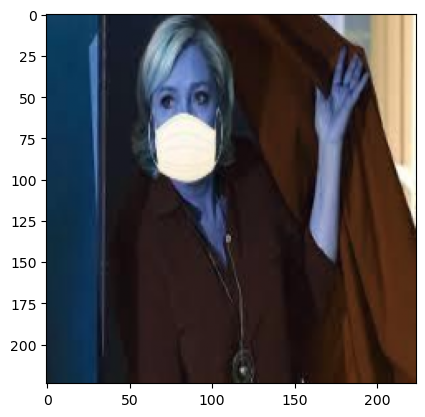

In [351]:
plt.imshow(X_train[12])

In [347]:
y_train[12]

0

In [295]:
y_train.shape

(1023,)

### Import VGG16 model

In [296]:
from keras.applications.vgg16 import VGG16

In [297]:
vgg=VGG16()

In [298]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [299]:
from keras import Sequential

# Create Model

In [300]:
model=Sequential()

In [301]:
# add all layers of VGG16 except last prediction layer
for layer in vgg.layers[:-1]:
    model.add(layer)

In [302]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [303]:
for layer in model.layers:
    layer.trainable=False

In [304]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [305]:
from keras.layers import Dense

## Add last layer to model

In [306]:
model.add(Dense(1,activation='sigmoid'))

In [307]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [308]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit Model

In [309]:
model.fit(X_train,y_train,epochs=7,validation_data=(X_test,y_test))

Epoch 1/7
32/32 [==============================] - 248s 8s/step - loss: 0.5625 - accuracy: 0.7410 - val_loss: 0.4691 - val_accuracy: 0.7539
Epoch 2/7
32/32 [==============================] - 255s 8s/step - loss: 0.3922 - accuracy: 0.8416 - val_loss: 0.2877 - val_accuracy: 0.9141
Epoch 3/7
32/32 [==============================] - 247s 8s/step - loss: 0.2688 - accuracy: 0.9130 - val_loss: 0.2752 - val_accuracy: 0.9258
Epoch 4/7
32/32 [==============================] - 252s 8s/step - loss: 0.2230 - accuracy: 0.9335 - val_loss: 0.2185 - val_accuracy: 0.9375
Epoch 5/7
32/32 [==============================] - 249s 8s/step - loss: 0.1918 - accuracy: 0.9482 - val_loss: 0.1969 - val_accuracy: 0.9414
Epoch 6/7
32/32 [==============================] - 249s 8s/step - loss: 0.1737 - accuracy: 0.9511 - val_loss: 0.1844 - val_accuracy: 0.9453
Epoch 7/7
32/32 [==============================] - 251s 8s/step - loss: 0.1583 - accuracy: 0.9511 - val_loss: 0.1595 - val_accuracy: 0.9609


### Prediction 

In [310]:
prediction=model.predict(X_test)
prediction[:5]

8/8 [==============================] - 53s 7s/step


array([[0.07055275],
       [0.6139035 ],
       [0.9145518 ],
       [0.13805903],
       [0.9533773 ]], dtype=float32)

In [311]:
def pred(prediction):
    y_pred=[]
    for pred in prediction:
        if pred>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [312]:
y_pred_c=pred(prediction)

In [313]:
y_pred_c[:5]

[0, 1, 1, 0, 1]

In [314]:
y_test[:5]

array([0, 1, 1, 0, 1])

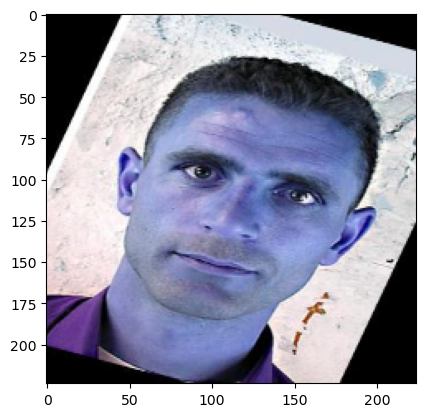

In [373]:
plt.imshow(X_test[1])

In [374]:
y_test[1]

1

In [316]:
from sklearn.metrics import confusion_matrix, classification_report

## Classification Report

In [317]:
print(classification_report(y_test,y_pred_c))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       116
           1       0.96      0.96      0.96       140

    accuracy                           0.96       256
   macro avg       0.96      0.96      0.96       256
weighted avg       0.96      0.96      0.96       256



In [318]:
cap=cv2.VideoCapture(0)

In [319]:
haar=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

### Face detection using HaarCascade

In [320]:
def detect_face(img):
    cords=haar.detectMultiScale(img,scaleFactor=1.3, minNeighbors=3)
    return(cords)
    

### Face Mask Prediction

In [321]:
def detect_face_mask(img):
    y_pred=model.predict(img.reshape(1,224,224,3))
    return y_pred

### Write Text on image

In [322]:
def draw_label(img,text,pos,bg_color):
    text_size=cv2.getTextSize(text,cv2.FONT_HERSHEY_PLAIN,1,cv2.FILLED)
    end_x=pos[0]+text_size[0][0]+2
    end_y=pos[1]+text_size[0][1]-2
    cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_PLAIN,1,(0,0,0),1,cv2.LINE_AA)

## Face Mask Prediction and face Detection in Video

In [323]:
while True:
    ret,frame=cap.read()
    #call detection method
    img=cv2.resize(frame,(224,224))
    y_pred=detect_face_mask(img)
    y_pred=y_pred[0][0]
    
    cords=detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    
    for x,y,w,h in cords:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
    
    if y_pred>0.5:
        y_pred=1
    else:
        y_pred=0
    
    if y_pred==0:
        draw_label(frame,'Face Mask detected',(30,30),(0,255,0))
    else:
        draw_label(frame,'No Face Mask',(30,30),(0,0,255))
    
    cv2.imshow('window',frame)
    
    if cv2.waitKey(1) & 0xFF==ord('x'):
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 262ms/step


1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 262ms/step


1/1 [==============================] - 0s 264ms/step


# Prediction On sample Image

In [324]:
def pred(prediction):
    y_pred=[]
    for pred in prediction:
        if pred>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred[0]

In [325]:
img=cv2.imread('mask.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))

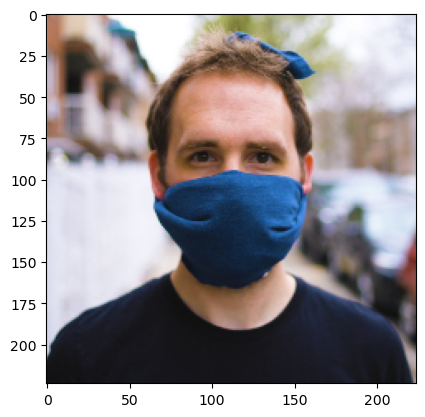

In [326]:
plt.imshow(img)

In [327]:
out=detect_face_mask(img)

1/1 [==============================] - 0s 263ms/step


In [328]:
#0-with mask and 1-without mask
out=out[0][0]
out

9.144338e-11

In [329]:
cords=detect_face(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

# y_pred=detect_face_mask(img)

for x,y,w,h in cords:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


if out>0.5:
    out=1
else:
    out=0
    
if out==0:
        draw_label(img,'Face Mask detected',(30,30),(0,255,0))
if out==1:
        draw_label(img,'No Face Mask',(30,30),(0,0,255))

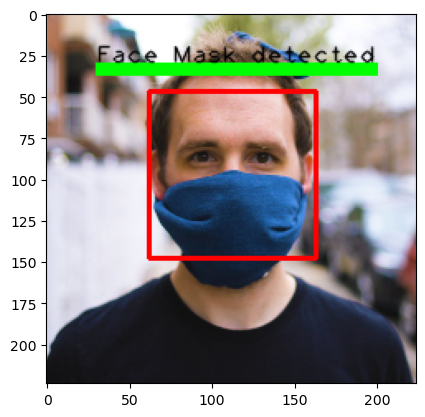

In [330]:
plt.imshow(img)

## Face Mask prediction and face detection on Image

In [366]:
def detect_mask_image(img):
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    out=detect_face_mask(img)
    out=out[0][0]
    
    cords=detect_face(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

    for x,y,w,h in cords:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#             roi=img[y:y+h,x:x+w]
            
#     img=cv2.resize(roi,(224,224),interpolation=cv2.INTER_AREA)
#     out=detect_face_mask(img)
#     out=out[0][0]


    if out>0.5:
        out=1
    else:
        out=0

    if out==0:
            draw_label(img,'Face Mask detected',(30,30),(0,255,0))
    if out==1:
            draw_label(img,'No Face Mask',(30,30),(0,0,255))
    plt.imshow(img)

1/1 [==============================] - 0s 267ms/step


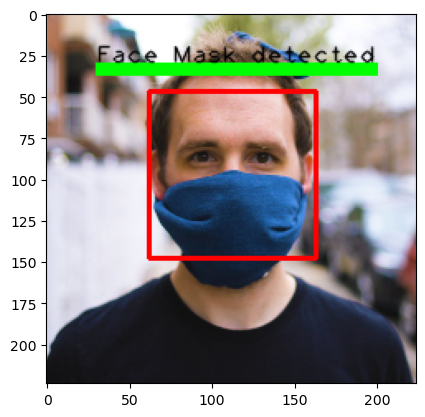

In [367]:
detect_mask_image('mask.jpeg')

1/1 [==============================] - 0s 258ms/step


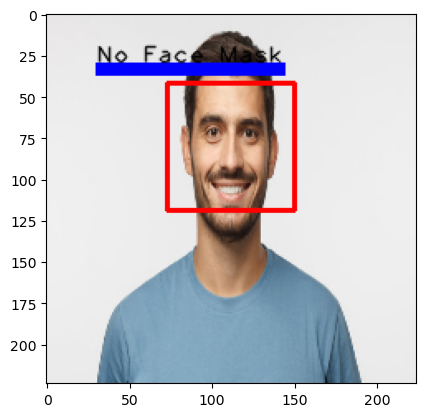

In [368]:
detect_mask_image('mask2.jpeg')

1/1 [==============================] - 0s 311ms/step


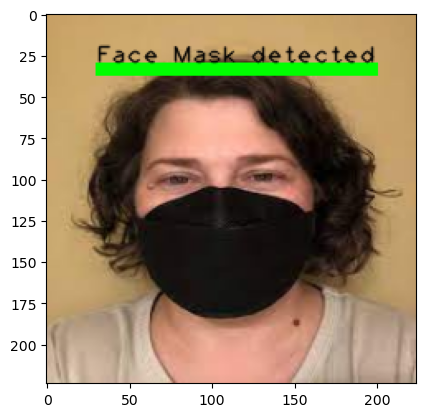

In [369]:
detect_mask_image('mask4.jpeg')